In [93]:
import pandas
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

In [22]:
target = (pandas.read_csv('gbm-data.csv', usecols=[0]))
features = pandas.read_csv('gbm-data.csv', usecols = (range(1,1777)))
target = np.array(target)
features = np.array(features)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(features, target,
                                                    test_size = 0.8, random_state = 241)

In [30]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(750, 1776) (750, 1)
(3001, 1776) (3001, 1)


In [34]:
clf_1= GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241,
                                  learning_rate=1)
clf_05= GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241,
                                  learning_rate=0.5)
clf_03= GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241,
                                  learning_rate=0.3)
clf_02= GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241,
                                  learning_rate=0.2)
clf_01= GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241,
                                  learning_rate=0.1)

In [35]:
clf_1.fit(x_train, y_train)
clf_05.fit(x_train, y_train)
clf_03.fit(x_train, y_train)
clf_02.fit(x_train, y_train)
clf_01.fit(x_train, y_train)

/home/egor/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1           1.0190           20.29s
         2           0.9192           18.81s
         3           0.8272           17.51s
         4           0.7834           17.01s
         5           0.7109           17.13s
         6           0.6368           17.58s
         7           0.5797           17.43s
         8           0.5610           16.92s
         9           0.5185           16.85s
        10           0.4984           16.57s
        20           0.1999           16.72s
        30           0.1313           15.74s
        40           0.0790           14.46s
        50           0.0511           13.96s
        60           0.0352           13.05s
        70           0.0245           12.08s
        80           0.0162           11.32s
        90           0.0114           10.54s
       100           0.0077            9.73s
       200           0.0004            2.81s
      Iter       Train Loss   Remaining Time 
        

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=241, subsample=1.0,
              verbose=True, warm_start=False)

In [91]:
def loss_plot(clf, f_train, f_test, t_train, t_test):
    f_1 = enumerate(clf.staged_decision_function(X= f_train))
    f_2 = enumerate(clf.staged_decision_function(X= f_test))
    y_pred_train = []
    y_pred_test = []
    for i, y in f_1:
        y_pred_train.append(1/(1+np.exp(-y)))
    for i, y in f_2:
        y_pred_test.append(1/(1+np.exp(-y)))
    y_pred_train = np.array(y_pred_train)
    y_pred_test = np.array(y_pred_test)
    
    
    loss_train = []
    for i in range(len(y_pred_train)):
        loss_train.append(log_loss(t_train, y_pred_train[i]))
    loss_test = []
    l = 1000
    k = 0
    for i in range(len(y_pred_train)):
        loss_test.append(log_loss(t_test, y_pred_test[i]))
        if l >= loss_test[i]:
            l = loss_test[i]
            k = i+1
    plt.figure()
    plt.plot(loss_test, 'r', linewidth = 1)
    plt.plot(loss_train, 'b', linewidth = 1)
    plt.legend(['test', 'train'])
    print(l, k)

0.5314507963190638 37


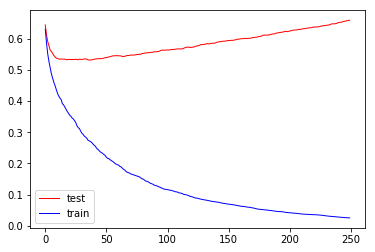

In [92]:
loss_plot(clf_02, x_train, x_test, y_train, y_test)

In [94]:
clf = RandomForestClassifier(n_estimators=37, random_state=241)

In [101]:
clf.fit(x_train, y_train)
predict = clf.predict_proba(x_test)
los = log_loss(y_test, predict)
print(los)

/home/egor/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


0.5409119099369897
